In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm

In [22]:
fuel_ecom = pd.read_csv('fuel-econ.csv')
fuel_ecom['trans'].value_counts()
fuel_ecom.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0.5, 0, 'vehicle class')

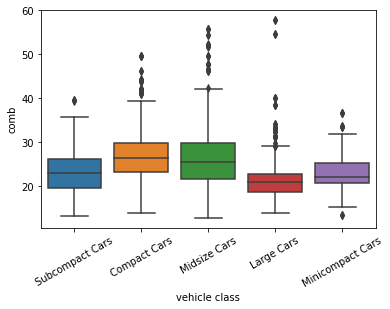

In [12]:
p = sns.boxplot(data=fuel_ecom, x='VClass', y='comb')
plt.xticks(rotation=30)
p.set_xlabel('vehicle class')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Subcompact Cars'),
  Text(1, 0, 'Compact Cars'),
  Text(2, 0, 'Midsize Cars'),
  Text(3, 0, 'Large Cars'),
  Text(4, 0, 'Minicompact Cars')])

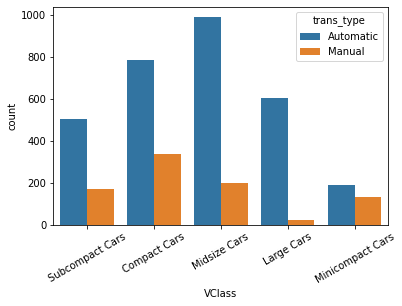

In [20]:
fuel_ecom['trans_type'] = fuel_ecom['trans'].apply(lambda x: x.split()[0])
sns.countplot(data=fuel_ecom, x='VClass', hue='trans_type') 
plt.xticks(rotation = 30)

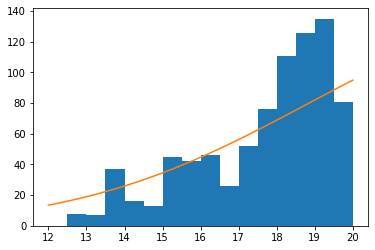

In [34]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(12, 20 + bin_size, bin_size)
plt.hist(data = fuel_ecom, x = 'comb', bins = bin_edges)

# overlay a theoretical normal distribution on top
samp_mean = fuel_ecom['comb'].mean()
samp_sd = fuel_ecom['comb'].std()

x = np.linspace(12, 20, 100)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= fuel_ecom.shape[0] * bin_size # scale the distribution height

plt.plot(x, y)



/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be place

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Subcompact Cars'),
  Text(1, 0, 'Compact Cars'),
  Text(2, 0, 'Midsize Cars'),
  Text(3, 0, 'Large Cars'),
  Text(4, 0, 'Minicompact Cars')])

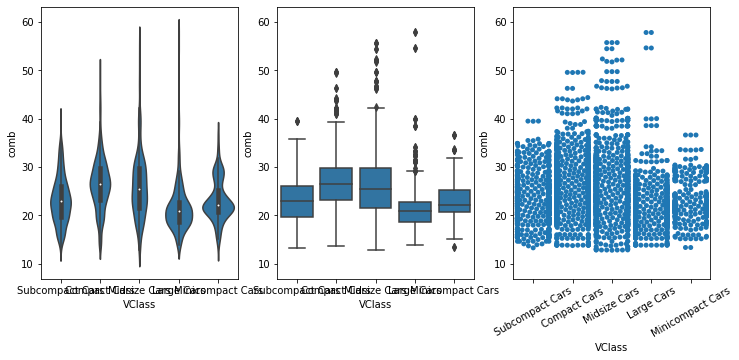

In [38]:
plt.figure(figsize = [12, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sns.violinplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# right plot: swarm plot
plt.subplot(1, 3, 3)
sns.swarmplot(data = fuel_ecom, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=30)

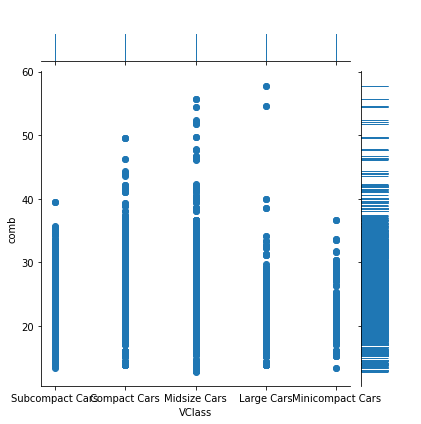

In [40]:
g = sns.JointGrid(data=fuel_ecom, x='VClass', y = 'comb')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot,height=0.5)

<AxesSubplot:xlabel='comb', ylabel='VClass'>

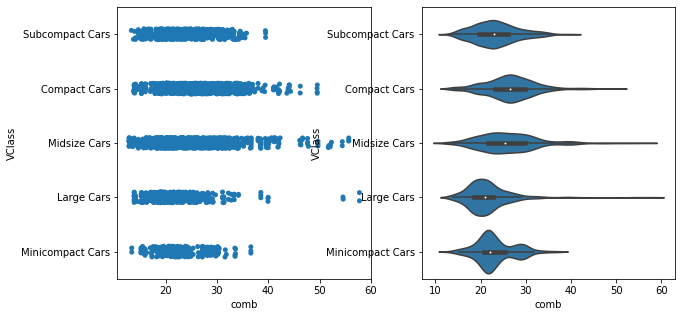

In [48]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(data = fuel_ecom, y = 'VClass', x = 'comb', color=base_color)

plt.subplot(1, 2, 2)
sns.violinplot(data = fuel_ecom, y = 'VClass', x = 'comb', color=base_color)

/Volumes/work/Course Lecture/Udacity/DataScientistNanodegree/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


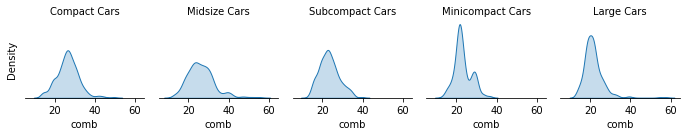

In [63]:
group_means = fuel_ecom.groupby(['VClass']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index

g = sns.FacetGrid(data = fuel_ecom, col = 'VClass', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(sns.kdeplot, 'comb', shade=True)
g.set_titles('{col_name}')

g.set(yticks=[])
g.despine(left=True)


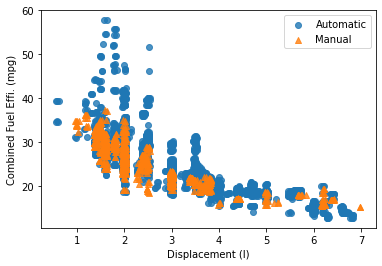

In [67]:
type_marker =  [['Automatic', 'o'], ['Manual', '^']]
fuel_ecom['trans_type'] = fuel_ecom['trans'].apply(lambda x: x.split()[0])

for ttype, markers in type_marker:
    plot_data = fuel_ecom[fuel_ecom['trans_type']==ttype]
    sns.regplot(data = plot_data, x = "displ", y = 'comb', x_jitter = 0.04, fit_reg=False,  marker = markers)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Effi. (mpg)')
plt.legend(['Automatic', 'Manual'])